# 輕鬆學習 Python | 從基礎到應用，成為初級 Python 資料分析師

> NumPy：實踐科學計算的 Python 模組

郭耀仁

## 課程綱要

- 為什麼資料分析師需要 NumPy
- NumPy 基礎
- NumPy 技巧

## 為什麼資料分析師需要 NumPy

## 如何將這幾個長跑距離（公里）轉換為英里？

In [1]:
distances = [1, 1.6, 3, 5, 10, 21.097, 42.195]

In [2]:
# list comprehension
dist_in_mile = [d * 0.62137 for d in distances]
print(dist_in_mile)

[0.62137, 0.994192, 1.86411, 3.1068499999999997, 6.213699999999999, 13.10904289, 26.21870715]


In [3]:
# lambda expression + map
dist_in_mile = list(map(lambda d : d * 0.62137, distances))
print(dist_in_mile)

[0.62137, 0.994192, 1.86411, 3.1068499999999997, 6.213699999999999, 13.10904289, 26.21870715]


## 如何計算 A 與 B 的內積 C？

$$
C_{i, j} = \sum{A_{i, k}B_{k, j}}
$$

In [4]:
A = [
    [1, 2],
    [4, 5]
]
B = [
    [4, 3],
    [2, 1]
]
# C = ?

In [5]:
# C is 2X2
C = [
    [0, 0],
    [0, 0]
]

for i in range(len(A)):
    for j in range(len(B[0])):
        for k in range(len(B)):
            C[i][j] += A[i][k] * B[k][j]

print(C)

[[8, 5], [26, 17]]


## 在科學計算使用者眼裡

- 以純量（scalar）作為運算單位還是太麻煩
- 哪些程式語言內建了 Vectorization（向量化）功能？
    - Matlab
    - R
    - Julia
    - ...etc.

## NumPy to the Rescue!

## 如何將這幾個長跑距離（公里）轉換為英里？

In [6]:
import numpy as np

distances = [1, 1.6, 3, 5, 10, 21.097, 42.195]
distances = np.array(distances)
dist_in_mile = distances * 0.62137
print(dist_in_mile)

[ 0.62137     0.994192    1.86411     3.10685     6.2137     13.10904289
 26.21870715]


## 如何計算 A 與 B 的內積 C？

In [7]:
import numpy as np

A = [
    [1, 2],
    [4, 5]
]
B = [
    [4, 3],
    [2, 1]
]
A = np.array(A)
B = np.array(B)
C = A @ B
print(C)

[[ 8  5]
 [26 17]]


## NumPy 基礎

## 什麼是 NumPy

> NumPy is the fundamental package for scientific computing in Python. It is a Python library that provides a multidimensional array object, various derived objects (such as masked arrays and matrices), and an assortment of routines for fast operations on arrays, including mathematical, logical, shape manipulation, sorting, selecting, I/O, discrete Fourier transforms, basic linear algebra, basic statistical operations, random simulation and much more.

- Numerical Python
- 創建一種稱為 ndarray 的類別，彌補了原生 list 缺少的向量化運算（vectorization）功能

## ndarray 類別的不同

> At the core of the NumPy package, is the ndarray object. This encapsulates n-dimensional arrays of homogeneous data types, with many operations being performed in compiled code for performance.

- 更動 NumPy arrays 的大小會創建新的陣列並刪除原本的物件
- 僅能容納相同的資料類型
- 具有 Fancy Indexing 特性

## 一個簡單範例

In [8]:
import numpy as np

a = np.arange(15).reshape(3, 5)
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [9]:
print(a.shape)
print(a.ndim)
print(a.dtype.name)
print(a.itemsize) # bytes
print(a.size)
print(type(a))

(3, 5)
2
int64
8
15
<class 'numpy.ndarray'>


## 創建陣列

使用 `np.array()` 將 Python list 或 tuple 轉換為 numpy array

In [10]:
a = np.array([2,3,4])
print(a)
print(a.dtype)
b = np.array([1.2, 3.5, 5.1])
print(b.dtype)

[2 3 4]
int64
float64


## 常見創建陣列錯誤

In [11]:
#a = np.array(1,2,3,4)    # WRONG
a = np.array([1,2,3,4])  # RIGHT

## 創建陣列可以傳入巢狀的 sequences

In [12]:
b = np.array([(1.5,2,3), (4,5,6)])
print(b)
print(b.shape)

[[1.5 2.  3. ]
 [4.  5.  6. ]]
(2, 3)


## 創建陣列可以指定資料類型

In [13]:
c = np.array([[1,2], [3,4]], dtype=complex)
print(c)

[[1.+0.j 2.+0.j]
 [3.+0.j 4.+0.j]]


## 更多創建陣列的函數

- `np.zeros()`
- `np.ones()`
- `np.empty()`

In [14]:
print(np.zeros((3,4)))
print(np.ones((2,3,4), dtype=np.int16)) # dtype can also be specified
print(np.empty((2,3))) # uninitialized, output may vary

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[[1 1 1 1]
  [1 1 1 1]
  [1 1 1 1]]

 [[1 1 1 1]
  [1 1 1 1]
  [1 1 1 1]]]
[[1.39069238e-309 1.39069238e-309 1.39069238e-309]
 [1.39069238e-309 1.39069238e-309 1.39069238e-309]]


## 創建陣列為數列的函數

- `np.arange()`
- `np.linspace()`

In [15]:
from numpy import pi

print(np.arange(10, 30, 5))
print(np.arange(0, 2, 0.3))
print(np.linspace(0, 2, 9))

[10 15 20 25]
[0.  0.3 0.6 0.9 1.2 1.5 1.8]
[0.   0.25 0.5  0.75 1.   1.25 1.5  1.75 2.  ]


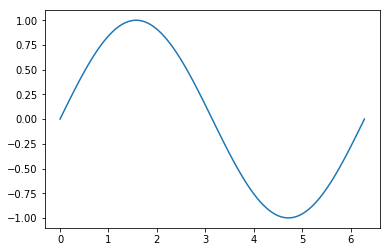

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt

x = np.linspace(0, 2*pi, 100)
f = np.sin(x)
plt.plot(x, f)
plt.show()

## 還有其他創建陣列的函數

- `np.random.rand()`
- `np.random.randn()`
- `np.fromfunction()`
- `np.fromfile()`

## 印出陣列

- 陣列如果太巨大，NumPy 會自動忽略中間的資訊
- 可以利用 `np.set_printoptions(threshold=np.nan)` 強制印出所有內容

In [17]:
print(np.arange(10000))
print(np.arange(10000).reshape(100,100))

[   0    1    2 ... 9997 9998 9999]
[[   0    1    2 ...   97   98   99]
 [ 100  101  102 ...  197  198  199]
 [ 200  201  202 ...  297  298  299]
 ...
 [9700 9701 9702 ... 9797 9798 9799]
 [9800 9801 9802 ... 9897 9898 9899]
 [9900 9901 9902 ... 9997 9998 9999]]


In [18]:
#np.set_printoptions(threshold=np.nan)
print(np.arange(10000))
print(np.arange(10000).reshape(100,100))

[   0    1    2 ... 9997 9998 9999]
[[   0    1    2 ...   97   98   99]
 [ 100  101  102 ...  197  198  199]
 [ 200  201  202 ...  297  298  299]
 ...
 [9700 9701 9702 ... 9797 9798 9799]
 [9800 9801 9802 ... 9897 9898 9899]
 [9900 9901 9902 ... 9997 9998 9999]]


In [19]:
# 還原預設值
#np.set_printoptions(edgeitems=3,infstr='inf',
#                    linewidth=75, nanstr='nan', precision=8,
#                    suppress=False, threshold=1000, formatter=None)

## 運算具備 elementwise 特性

- 數值運算符號（arithmetic operators）
- 布林判斷符號（boolean operators）

In [20]:
a = np.array([20,30,40,50])
b = np.arange(4)
c = a - b
print(c)
print(b**2)
print(10*np.sin(a))
print(a < 35)

[20 29 38 47]
[0 1 4 9]
[ 9.12945251 -9.88031624  7.4511316  -2.62374854]
[ True  True False False]


## 矩陣相乘的符號或函數

- `@`
- `np.dot()`

In [21]:
A = np.array([[1, 1], [0, 1]])
B = np.array([[2, 0],[3, 4]])
print(A * B)
print(A @ B)
print(np.dot(A, B))
print(A.dot(B))

[[2 0]
 [0 4]]
[[5 4]
 [3 4]]
[[5 4]
 [3 4]]
[[5 4]
 [3 4]]


## 型別不相同時依照 upcasting 規範

以較為普遍、泛用的型別做隱性資料類型轉換

In [22]:
a = np.ones(3, dtype=np.int32)
b = np.linspace(0,pi,3)
c = a+b
print(b.dtype.name)
print(c)
print(c.dtype.name)

float64
[1.         2.57079633 4.14159265]
float64


## 陣列的摘要以方法呼叫

In [23]:
a = np.random.random((2,3))
print(a)
print(a.sum())
print(a.max())
print(a.min())

[[0.22302689 0.78710396 0.08296254]
 [0.97942377 0.74954551 0.75440328]]
3.5764659451478136
0.9794237658402843
0.082962539604724


## 陣列的摘要可以指定 `axis` 參數

- `axis=0` 表示各欄的摘要
- `axis=1` 表示各列的摘要

In [24]:
b = np.arange(12).reshape(3,4)
print(b)
print(b.sum(axis=0))
print(b.min(axis=1))
print(b.cumsum(axis=1))

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[12 15 18 21]
[0 4 8]
[[ 0  1  3  6]
 [ 4  9 15 22]
 [ 8 17 27 38]]


## Universal functions: 輸入與輸出陣列長度相同的函數

In [25]:
B = np.arange(3)
print(np.exp(B))
print(np.sqrt(B))

[1.         2.71828183 7.3890561 ]
[0.         1.         1.41421356]


## 索引與切割陣列

跟原生 `list` 完全一樣

In [26]:
a = np.arange(10)**3
print(a)
print(a[2])
print(a[2:5])
print(a[:6:2])
print(a[::-1])

[  0   1   8  27  64 125 216 343 512 729]
8
[ 8 27 64]
[ 0  8 64]
[729 512 343 216 125  64  27   8   1   0]


## 索引與切割陣列

多維度的陣列要指定 `[m, n, ...]`

In [27]:
def f(x, y):
    return 10*x + y

b = np.fromfunction(f,(5,4),dtype=int)
print(b)

[[ 0  1  2  3]
 [10 11 12 13]
 [20 21 22 23]
 [30 31 32 33]
 [40 41 42 43]]


In [28]:
print(b[2, 3])
print(b[0:5, 1])
print(b[:, 1])
print(b[1:3, :])

23
[ 1 11 21 31 41]
[ 1 11 21 31 41]
[[10 11 12 13]
 [20 21 22 23]]


## NumPy 技巧

## 不那麼基礎的 NumPy 觀念

- 如何調整陣列外觀
- 如何複製陣列
- Broadcasting
- Fancy indexing
- 簡單的線代方法

## 如何調整陣列外觀

In [29]:
a = np.floor(10*np.random.random((3,4)))
print(a)
print(a.shape)
print(a.ravel())
print(a.reshape(6, 2))
print(a.T)

[[3. 4. 9. 4.]
 [2. 2. 4. 7.]
 [5. 5. 5. 5.]]
(3, 4)
[3. 4. 9. 4. 2. 2. 4. 7. 5. 5. 5. 5.]
[[3. 4.]
 [9. 4.]
 [2. 2.]
 [4. 7.]
 [5. 5.]
 [5. 5.]]
[[3. 2. 5.]
 [4. 2. 5.]
 [9. 4. 5.]
 [4. 7. 5.]]


## `arr.reshape()` 與 `arr.resize()` 的差別 

In [30]:
print(a)
print(a.reshape((2,6)))
print(a)
a.resize(2, 6)
print(a)

[[3. 4. 9. 4.]
 [2. 2. 4. 7.]
 [5. 5. 5. 5.]]
[[3. 4. 9. 4. 2. 2.]
 [4. 7. 5. 5. 5. 5.]]
[[3. 4. 9. 4.]
 [2. 2. 4. 7.]
 [5. 5. 5. 5.]]
[[3. 4. 9. 4. 2. 2.]
 [4. 7. 5. 5. 5. 5.]]


## 其中一個維度指派為 `-1` 讓 NumPy 自行計算

In [31]:
print(a.reshape(3, -1))

[[3. 4. 9. 4.]
 [2. 2. 4. 7.]
 [5. 5. 5. 5.]]


## 水平或垂直堆疊陣列

In [32]:
a = np.floor(10*np.random.random((2,2)))
b = np.floor(10*np.random.random((2,2)))
print(a)
print(b)
print(np.vstack((a,b)))
print(np.hstack((a,b)))

[[2. 5.]
 [4. 3.]]
[[3. 2.]
 [4. 3.]]
[[2. 5.]
 [4. 3.]
 [3. 2.]
 [4. 3.]]
[[2. 5. 3. 2.]
 [4. 3. 4. 3.]]


## 如何複製陣列

- 沒有複製
- View
- 複製

In [33]:
# 沒有複製
a = np.arange(12)
b = a
print(b is a)
b.resize(3, 4)
print(a)
print(id(a))
print(id(b))

True
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
4819441664
4819441664


In [34]:
# View
a = np.arange(12)
c = a.view()
print(c is a)
c.resize(2, 6)
print(a) # a's shape doesn't change
c[0, 4] = 999
print(a) # a's data changes

False
[ 0  1  2  3  4  5  6  7  8  9 10 11]
[  0   1   2   3 999   5   6   7   8   9  10  11]


In [35]:
# 複製
a = np.arange(12)
d = a.copy()
print(d is a)
d[4] = 999
print(a) # d doesn't share anything with a

False
[ 0  1  2  3  4  5  6  7  8  9 10 11]


## Broadcasting

NumPy 在運算碰到不同外觀時的應對方式

## Broadcasting 可以在兩個情況下順利運作

1. 維度相同
2. 其中一個為 1

In [36]:
a = np.arange(1, 4)
b = np.array([2, 2, 2])
print(a * b)

[2 4 6]


In [37]:
a = np.arange(1, 4)
b = 2
print(a * b)

[2 4 6]


## Fancy indexing

NumPy 具備比原生 `list` 索引、切割更彈性的選擇：

- 以陣列切割
- 以布林陣列切割

In [38]:
a = np.arange(12)**2
j = np.array([ 9, 7 ])
print(a[j])

[81 49]


In [39]:
a = np.arange(12)
b = a > 4
print(a[b])

[ 5  6  7  8  9 10 11]


## 簡單的線代方法

In [40]:
a = np.array([[1, 2], [3, 4]])
print(a)
print(a.transpose())
print(np.linalg.inv(a))
I = np.eye(2) # "eye" represents "I"
print(I)
print(np.trace(I))
y = np.array([[5], [7]])
print(np.linalg.solve(a, y)) # for ax=y, get x
print(np.linalg.eig(a))

[[1 2]
 [3 4]]
[[1 3]
 [2 4]]
[[-2.   1. ]
 [ 1.5 -0.5]]
[[1. 0.]
 [0. 1.]]
2.0
[[-3.]
 [ 4.]]
(array([-0.37228132,  5.37228132]), array([[-0.82456484, -0.41597356],
       [ 0.56576746, -0.90937671]]))


## 延伸閱讀

- [NumPy User Guide](https://www.numpy.org/devdocs/user/index.html)